# Random Forest - Complete Guide

## Table of Contents
1. [What is Random Forest?](#what-is-rf)
2. [Decision Trees - The Building Blocks](#decision-trees)
3. [Ensemble Learning - The Magic](#ensemble-learning)
4. [Visual Demonstrations](#visual-demos)
5. [Hyperparameter Tuning](#hyperparameter-tuning)
6. [Feature Importance Analysis](#feature-importance)
7. [Practical Examples](#practical-examples)
8. [Performance Analysis](#performance-analysis)
9. [Summary and Key Takeaways](#summary)

---


## 1. What is Random Forest? {#what-is-rf}

**Random Forest** is a powerful ensemble learning algorithm that combines multiple decision trees to make more accurate and robust predictions. It's one of the most popular and effective machine learning algorithms.

### Key Concepts:
- **Ensemble Method**: Combines multiple models (trees) to make predictions
- **Bootstrap Aggregating (Bagging)**: Each tree is trained on a random subset of data
- **Feature Randomness**: Each tree considers only a random subset of features
- **Voting/Averaging**: Final prediction is the majority vote (classification) or average (regression)

### Why Random Forest is Popular:
1. **High Accuracy** - Often achieves excellent performance out-of-the-box
2. **Robust to Overfitting** - Multiple trees reduce overfitting risk
3. **Handles Missing Data** - Can work with incomplete datasets
4. **Feature Importance** - Provides insights into which features matter most
5. **Works with Mixed Data** - Handles both numerical and categorical features
6. **No Feature Scaling** - Doesn't require data normalization
7. **Parallelizable** - Trees can be trained simultaneously

### Key Characteristics:
- **Non-parametric** - Makes no assumptions about data distribution
- **Interpretable** - Can visualize individual trees and feature importance
- **Versatile** - Works for both classification and regression
- **Robust** - Less sensitive to outliers and noise


In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, make_regression
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("🌲 Ready to explore Random Forest!")


✅ Libraries imported successfully!
🌲 Ready to explore Random Forest!


## 2. Decision Trees - The Building Blocks {#decision-trees}

Before understanding Random Forest, we need to understand **Decision Trees** - the fundamental building blocks.

### How Decision Trees Work:

1. **Root Node**: Contains all training data
2. **Splitting**: Choose the best feature and threshold to split data
3. **Recursion**: Repeat for each child node until stopping criteria
4. **Leaf Nodes**: Make final predictions

### Splitting Criteria:

#### For Classification:
- **Gini Impurity**: Measures how often a randomly chosen element would be incorrectly labeled
- **Entropy**: Measures the amount of information disorder
- **Information Gain**: Reduction in entropy after a split

#### For Regression:
- **Mean Squared Error (MSE)**: Minimizes variance in each split
- **Mean Absolute Error (MAE)**: More robust to outliers

### Key Parameters:
- **max_depth**: Maximum depth of the tree
- **min_samples_split**: Minimum samples required to split a node
- **min_samples_leaf**: Minimum samples required in a leaf node
- **max_features**: Maximum features to consider for splitting


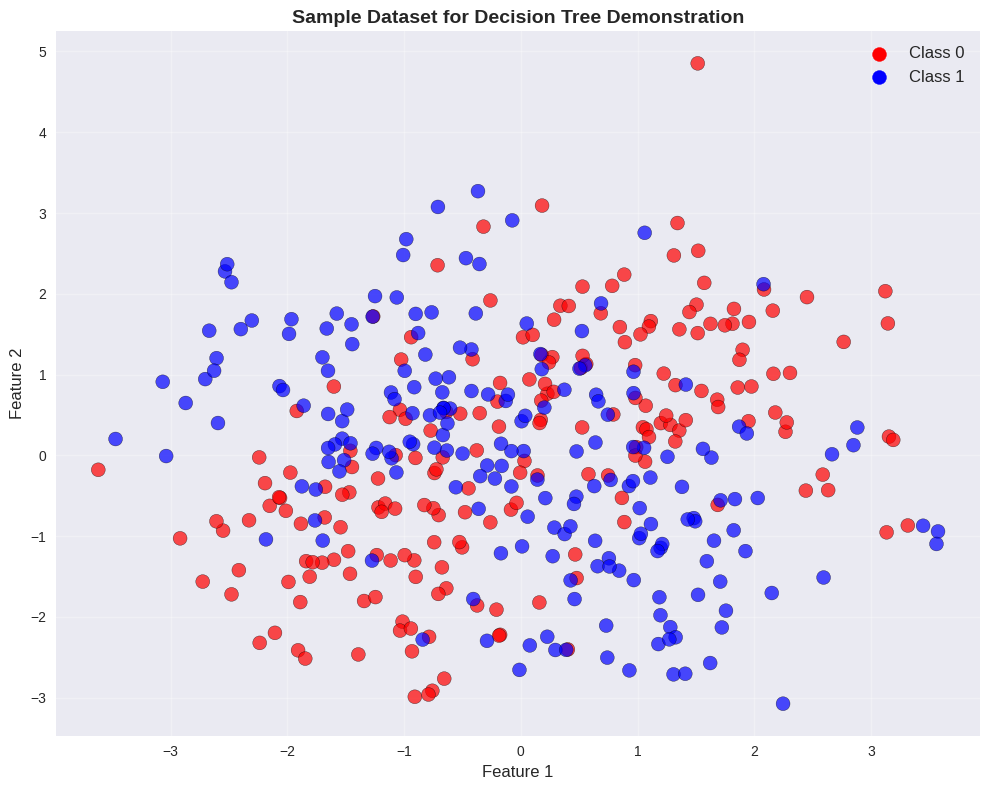

Dataset shape: (400, 2)
Classes: [0. 1.]
Class distribution: [200 200]


In [6]:
# Create a simple dataset to demonstrate decision trees
def create_tree_dataset():
    """Create a simple 2D dataset for decision tree visualization"""
    np.random.seed(42)
    
    # Create two classes with some overlap
    n_samples = 200
    
    # Class 0: Bottom-left and top-right
    X1 = np.random.randn(n_samples//2, 2) + [-1, -1]
    X2 = np.random.randn(n_samples//2, 2) + [1, 1]
    X_class0 = np.vstack([X1, X2])
    y_class0 = np.zeros(n_samples)
    
    # Class 1: Top-left and bottom-right
    X3 = np.random.randn(n_samples//2, 2) + [-1, 1]
    X4 = np.random.randn(n_samples//2, 2) + [1, -1]
    X_class1 = np.vstack([X3, X4])
    y_class1 = np.ones(n_samples)
    
    X = np.vstack([X_class0, X_class1])
    y = np.hstack([y_class0, y_class1])
    
    return X, y

X_tree, y_tree = create_tree_dataset()

# Visualize the dataset
plt.figure(figsize=(10, 8))
colors = ['red' if label == 0 else 'blue' for label in y_tree]
plt.scatter(X_tree[:, 0], X_tree[:, 1], c=colors, alpha=0.7, s=100, edgecolors='black')

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Sample Dataset for Decision Tree Demonstration', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add legend
plt.scatter([], [], c='red', label='Class 0', s=100)
plt.scatter([], [], c='blue', label='Class 1', s=100)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

print(f"Dataset shape: {X_tree.shape}")
print(f"Classes: {np.unique(y_tree)}")
print(f"Class distribution: {np.bincount(y_tree.astype(int))}")


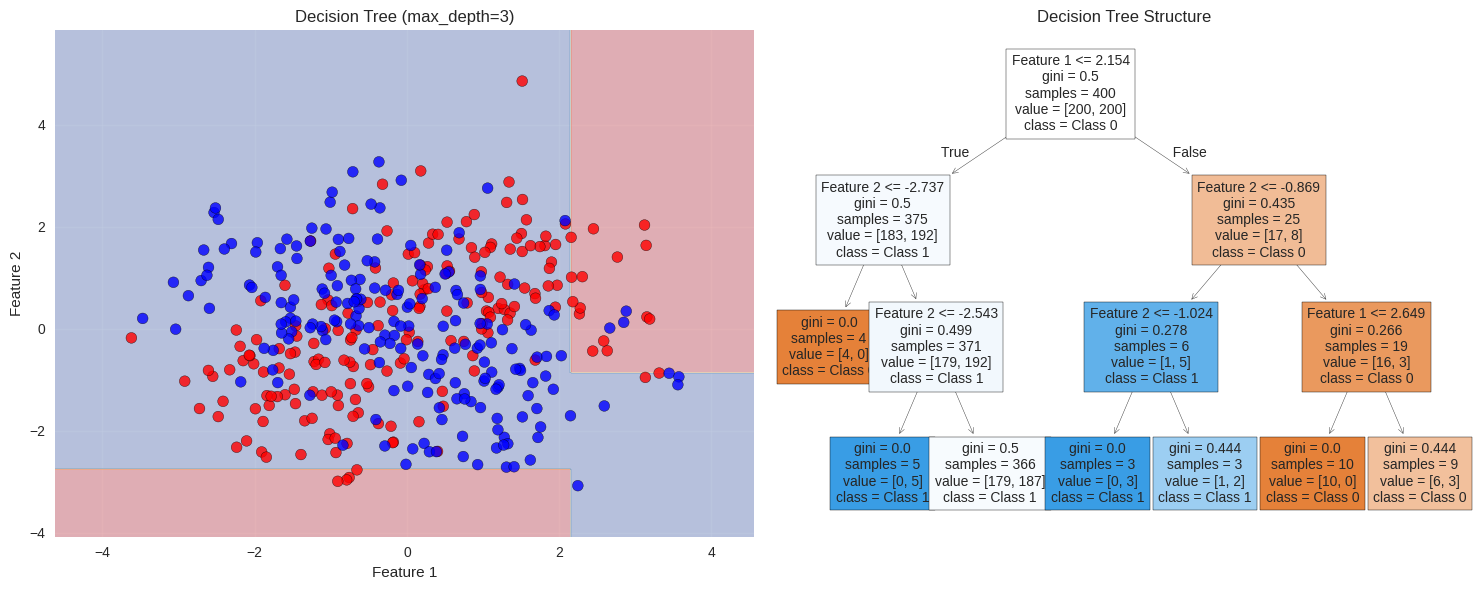

🌳 Decision Tree Rules:
|--- Feature 1 <= 2.15
|   |--- Feature 2 <= -2.74
|   |   |--- class: 0.0
|   |--- Feature 2 >  -2.74
|   |   |--- Feature 2 <= -2.54
|   |   |   |--- class: 1.0
|   |   |--- Feature 2 >  -2.54
|   |   |   |--- class: 1.0
|--- Feature 1 >  2.15
|   |--- Feature 2 <= -0.87
|   |   |--- Feature 2 <= -1.02
|   |   |   |--- class: 1.0
|   |   |--- Feature 2 >  -1.02
|   |   |   |--- class: 1.0
|   |--- Feature 2 >  -0.87
|   |   |--- Feature 1 <= 2.65
|   |   |   |--- class: 0.0
|   |   |--- Feature 1 >  2.65
|   |   |   |--- class: 0.0


📊 Tree Accuracy: 0.542


In [7]:
# Train and visualize a decision tree
def train_and_visualize_tree(X, y, max_depth=3):
    """Train a decision tree and visualize its decision boundary"""
    # Train decision tree
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X, y)
    
    # Create mesh grid for decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on mesh grid
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Decision boundary
    ax1.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    colors = ['red' if label == 0 else 'blue' for label in y]
    ax1.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.8, s=60, edgecolors='black')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title(f'Decision Tree (max_depth={max_depth})')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Tree structure
    plot_tree(tree, filled=True, feature_names=['Feature 1', 'Feature 2'], 
              class_names=['Class 0', 'Class 1'], ax=ax2, fontsize=10)
    ax2.set_title('Decision Tree Structure')
    
    plt.tight_layout()
    plt.show()
    
    # Print tree rules
    print("🌳 Decision Tree Rules:")
    print(export_text(tree, feature_names=['Feature 1', 'Feature 2']))
    
    # Calculate accuracy
    accuracy = tree.score(X, y)
    print(f"\n📊 Tree Accuracy: {accuracy:.3f}")
    
    return tree

# Train and visualize decision tree
tree_model = train_and_visualize_tree(X_tree, y_tree, max_depth=3)


## 3. Ensemble Learning - The Magic {#ensemble-learning}

**Random Forest** combines multiple decision trees using ensemble learning techniques to create a more robust and accurate model.

### The Random Forest Algorithm:

1. **Bootstrap Sampling**: Create multiple datasets by sampling with replacement
2. **Feature Randomness**: For each tree, randomly select a subset of features
3. **Tree Training**: Train each tree independently on its bootstrap sample
4. **Prediction**: Combine predictions from all trees (majority vote for classification, average for regression)

### Why Ensemble Learning Works:

#### 1. **Bias Reduction**:
- Individual trees may have high bias
- Averaging multiple trees reduces overall bias

#### 2. **Variance Reduction**:
- Individual trees may overfit (high variance)
- Averaging reduces variance

#### 3. **Error Correction**:
- Different trees make different errors
- Ensemble can correct individual mistakes

### Key Advantages of Random Forest:

- **Reduces Overfitting**: Multiple trees prevent overfitting
- **Handles Missing Data**: Can work with incomplete datasets
- **Feature Importance**: Provides insights into feature relevance
- **Parallelizable**: Trees can be trained simultaneously
- **Robust**: Less sensitive to outliers and noise


## 4. Visual Demonstrations {#visual-demos}

Let's see Random Forest in action and compare it with individual decision trees.


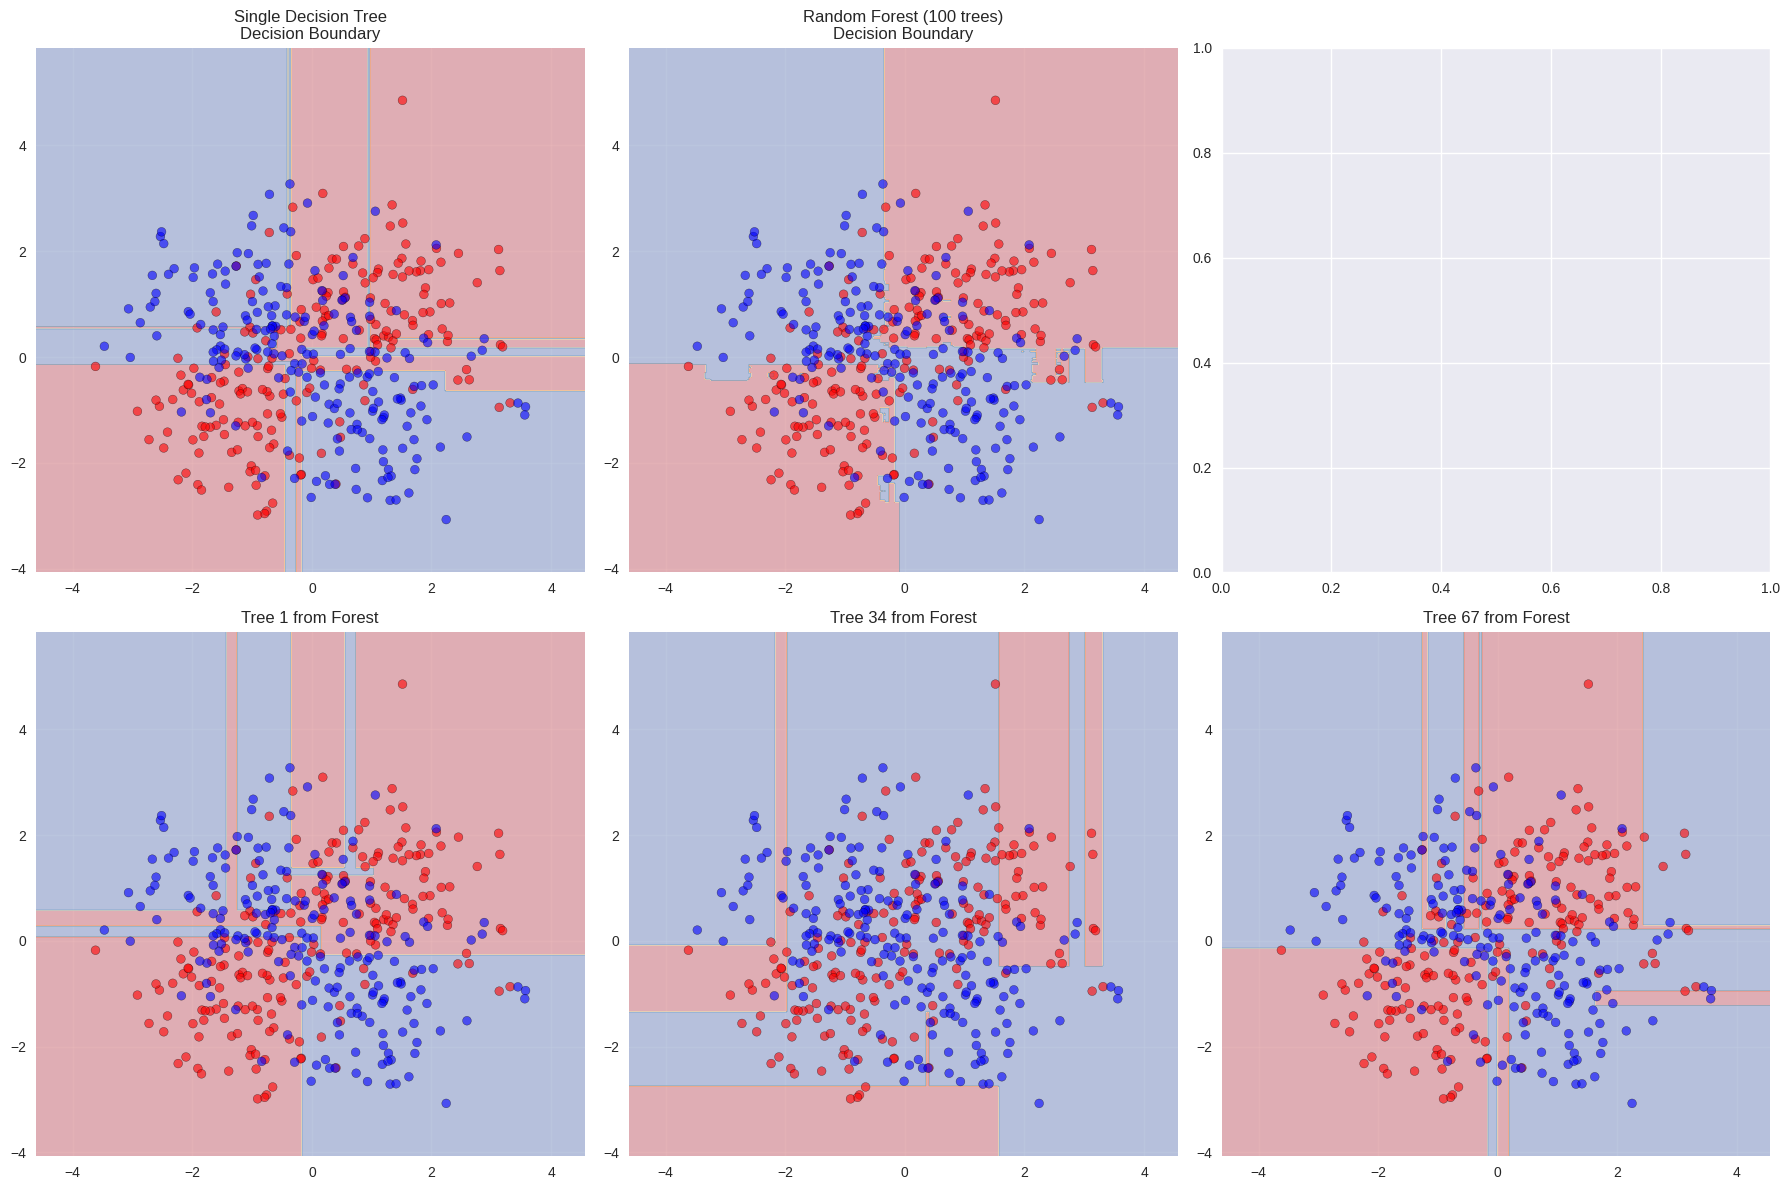

📊 Performance Comparison:
Model                Train Acc    Test Acc     Overfitting 
--------------------------------------------------
Single Tree          0.868        0.758        0.110       
Random Forest        0.832        0.750        0.082       


In [8]:
# Compare Decision Tree vs Random Forest
def compare_tree_vs_forest(X, y):
    """Compare single decision tree with random forest"""
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train models
    tree = DecisionTreeClassifier(max_depth=5, random_state=42)
    forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    
    tree.fit(X_train, y_train)
    forest.fit(X_train, y_train)
    
    # Calculate accuracies
    tree_train_acc = tree.score(X_train, y_train)
    tree_test_acc = tree.score(X_test, y_test)
    forest_train_acc = forest.score(X_train, y_train)
    forest_test_acc = forest.score(X_test, y_test)
    
    # Create visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Create mesh grid
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Plot decision boundaries
    models = [tree, forest]
    titles = ['Single Decision Tree', 'Random Forest (100 trees)']
    
    for i, (model, title) in enumerate(zip(models, titles)):
        # Decision boundary
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        axes[0, i].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
        colors = ['red' if label == 0 else 'blue' for label in y]
        axes[0, i].scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6, s=40, edgecolors='black')
        axes[0, i].set_title(f'{title}\nDecision Boundary')
        axes[0, i].grid(True, alpha=0.3)
    
    # Plot individual trees from random forest
    for i in range(3):
        tree_idx = i * 33  # Show trees 0, 33, 66
        individual_tree = forest.estimators_[tree_idx]
        Z = individual_tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        axes[1, i].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
        axes[1, i].scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6, s=40, edgecolors='black')
        axes[1, i].set_title(f'Tree {tree_idx + 1} from Forest')
        axes[1, i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print performance comparison
    print("📊 Performance Comparison:")
    print("=" * 50)
    print(f"{'Model':<20} {'Train Acc':<12} {'Test Acc':<12} {'Overfitting':<12}")
    print("-" * 50)
    print(f"{'Single Tree':<20} {tree_train_acc:<12.3f} {tree_test_acc:<12.3f} {tree_train_acc - tree_test_acc:<12.3f}")
    print(f"{'Random Forest':<20} {forest_train_acc:<12.3f} {forest_test_acc:<12.3f} {forest_train_acc - forest_test_acc:<12.3f}")
    
    return tree, forest

# Run comparison
tree_model, forest_model = compare_tree_vs_forest(X_tree, y_tree)


## 5. Hyperparameter Tuning {#hyperparameter-tuning}

Random Forest has several important hyperparameters that can significantly affect performance. Let's explore them systematically.


🌲 Analyzing Number of Trees (n_estimators):
Trees    Train Acc    Test Acc     Time (s)    
------------------------------------------------------------
1        0.846        0.725        0.002       
5        0.946        0.725        0.004       
10       0.971        0.692        0.008       
25       0.996        0.733        0.017       
50       1.000        0.725        0.033       
100      1.000        0.725        0.065       
200      1.000        0.742        0.132       
300      1.000        0.733        0.189       


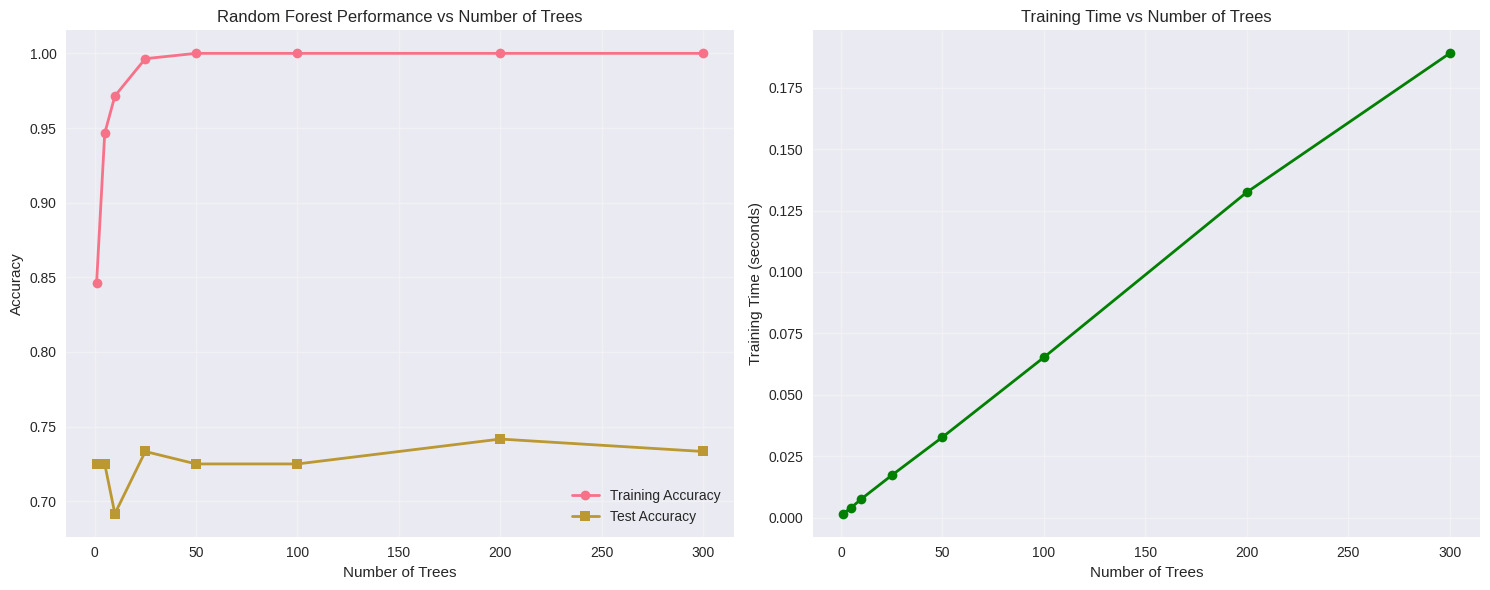

In [9]:
# Analyze the effect of number of trees (n_estimators)
def analyze_n_estimators(X, y):
    """Analyze how the number of trees affects Random Forest performance"""
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Test different numbers of trees
    n_estimators_range = [1, 5, 10, 25, 50, 100, 200, 300]
    train_scores = []
    test_scores = []
    training_times = []
    
    print("🌲 Analyzing Number of Trees (n_estimators):")
    print("=" * 60)
    print(f"{'Trees':<8} {'Train Acc':<12} {'Test Acc':<12} {'Time (s)':<12}")
    print("-" * 60)
    
    for n_est in n_estimators_range:
        # Train Random Forest
        import time
        start_time = time.time()
        rf = RandomForestClassifier(n_estimators=n_est, random_state=42)
        rf.fit(X_train, y_train)
        training_time = time.time() - start_time
        
        # Calculate accuracies
        train_acc = rf.score(X_train, y_train)
        test_acc = rf.score(X_test, y_test)
        
        train_scores.append(train_acc)
        test_scores.append(test_acc)
        training_times.append(training_time)
        
        print(f"{n_est:<8} {train_acc:<12.3f} {test_acc:<12.3f} {training_time:<12.3f}")
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Accuracy vs number of trees
    ax1.plot(n_estimators_range, train_scores, 'o-', label='Training Accuracy', linewidth=2)
    ax1.plot(n_estimators_range, test_scores, 's-', label='Test Accuracy', linewidth=2)
    ax1.set_xlabel('Number of Trees')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Random Forest Performance vs Number of Trees')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Training time vs number of trees
    ax2.plot(n_estimators_range, training_times, 'o-', color='green', linewidth=2)
    ax2.set_xlabel('Number of Trees')
    ax2.set_ylabel('Training Time (seconds)')
    ax2.set_title('Training Time vs Number of Trees')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return n_estimators_range, train_scores, test_scores, training_times

# Run analysis
n_est_range, train_scores, test_scores, train_times = analyze_n_estimators(X_tree, y_tree)



🌳 Analyzing Max Depth:
Max Depth    Train Acc    Test Acc    
--------------------------------------------------
1            0.589        0.433       
2            0.804        0.717       
3            0.818        0.742       
4            0.825        0.775       
5            0.832        0.750       
6            0.857        0.750       
7            0.914        0.742       
8            0.946        0.758       
9            0.971        0.733       
10           0.996        0.750       
None         1.000        0.725       


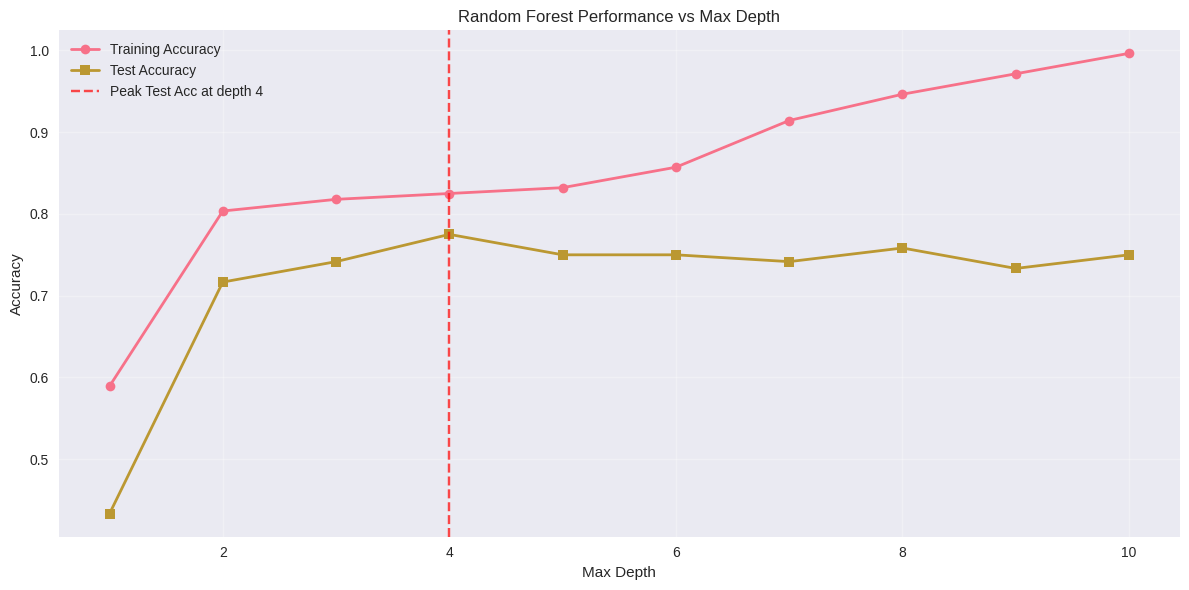

In [10]:
# Analyze the effect of max_depth
def analyze_max_depth(X, y):
    """Analyze how max_depth affects Random Forest performance"""
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Test different max_depth values
    max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
    train_scores = []
    test_scores = []
    
    print("\n🌳 Analyzing Max Depth:")
    print("=" * 50)
    print(f"{'Max Depth':<12} {'Train Acc':<12} {'Test Acc':<12}")
    print("-" * 50)
    
    for max_d in max_depth_range:
        # Train Random Forest
        rf = RandomForestClassifier(n_estimators=100, max_depth=max_d, random_state=42)
        rf.fit(X_train, y_train)
        
        # Calculate accuracies
        train_acc = rf.score(X_train, y_train)
        test_acc = rf.score(X_test, y_test)
        
        train_scores.append(train_acc)
        test_scores.append(test_acc)
        
        depth_str = "None" if max_d is None else str(max_d)
        print(f"{depth_str:<12} {train_acc:<12.3f} {test_acc:<12.3f}")
    
    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(max_depth_range, train_scores, 'o-', label='Training Accuracy', linewidth=2)
    plt.plot(max_depth_range, test_scores, 's-', label='Test Accuracy', linewidth=2)
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title('Random Forest Performance vs Max Depth')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Highlight the point where overfitting starts
    if len(max_depth_range) > 1:
        # Find where test accuracy starts decreasing
        test_scores_array = np.array(test_scores)
        if len(test_scores_array) > 2:
            # Find the peak test accuracy
            peak_idx = np.argmax(test_scores_array)
            plt.axvline(x=max_depth_range[peak_idx], color='red', linestyle='--', alpha=0.7, 
                       label=f'Peak Test Acc at depth {max_depth_range[peak_idx]}')
            plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return max_depth_range, train_scores, test_scores

# Run analysis
max_depths, train_scores_depth, test_scores_depth = analyze_max_depth(X_tree, y_tree)


## 6. Feature Importance Analysis {#feature-importance}

One of the most powerful features of Random Forest is its ability to provide **feature importance** - insights into which features are most important for making predictions.


🍷 Wine Dataset Information:
Features: 13
Samples: 178
Classes: ['class_0' 'class_1' 'class_2']


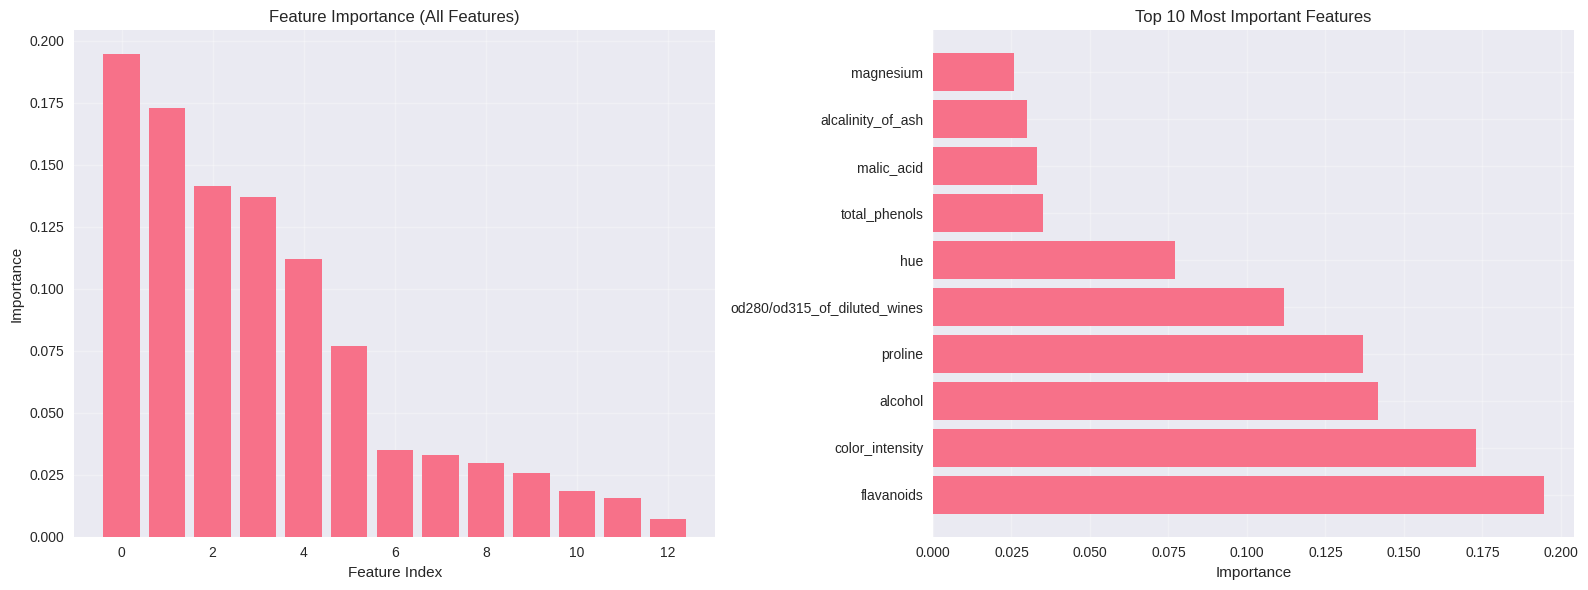


📊 Feature Importance Rankings:
Rank   Feature                   Importance  
------------------------------------------------------------
1      flavanoids                0.1945      
2      color_intensity           0.1730      
3      alcohol                   0.1416      
4      proline                   0.1370      
5      od280/od315_of_diluted_wines 0.1118      
6      hue                       0.0769      
7      total_phenols             0.0351      
8      malic_acid                0.0331      
9      alcalinity_of_ash         0.0299      
10     magnesium                 0.0259      
11     proanthocyanins           0.0184      
12     ash                       0.0155      
13     nonflavanoid_phenols      0.0073      


In [11]:
# Load a real dataset for feature importance analysis
def analyze_feature_importance():
    """Analyze feature importance using a real dataset"""
    # Load the Wine dataset
    wine = datasets.load_wine()
    X_wine = wine.data
    y_wine = wine.target
    feature_names = wine.feature_names
    
    print("🍷 Wine Dataset Information:")
    print(f"Features: {len(feature_names)}")
    print(f"Samples: {X_wine.shape[0]}")
    print(f"Classes: {wine.target_names}")
    
    # Train Random Forest
    rf_wine = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_wine.fit(X_wine, y_wine)
    
    # Get feature importances
    importances = rf_wine.feature_importances_
    
    # Create feature importance visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar plot of feature importances
    indices = np.argsort(importances)[::-1]
    ax1.bar(range(len(importances)), importances[indices])
    ax1.set_title('Feature Importance (All Features)')
    ax1.set_xlabel('Feature Index')
    ax1.set_ylabel('Importance')
    ax1.grid(True, alpha=0.3)
    
    # Top 10 most important features
    top_n = min(10, len(feature_names))
    top_indices = indices[:top_n]
    top_importances = importances[top_indices]
    top_names = [feature_names[i] for i in top_indices]
    
    ax2.barh(range(top_n), top_importances)
    ax2.set_yticks(range(top_n))
    ax2.set_yticklabels(top_names)
    ax2.set_title(f'Top {top_n} Most Important Features')
    ax2.set_xlabel('Importance')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print feature importance table
    print("\n📊 Feature Importance Rankings:")
    print("=" * 60)
    print(f"{'Rank':<6} {'Feature':<25} {'Importance':<12}")
    print("-" * 60)
    
    for i, idx in enumerate(indices):
        print(f"{i+1:<6} {feature_names[idx]:<25} {importances[idx]:<12.4f}")
    
    return rf_wine, importances, feature_names

# Run feature importance analysis
rf_wine, wine_importances, wine_features = analyze_feature_importance()


## 7. Practical Examples {#practical-examples}

Let's work with real datasets to see Random Forest in action for both classification and regression tasks.


🌸 Random Forest Classification - Iris Dataset:
Accuracy: 1.000
Number of trees: 100
Training samples: 105
Test samples: 45

📋 Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



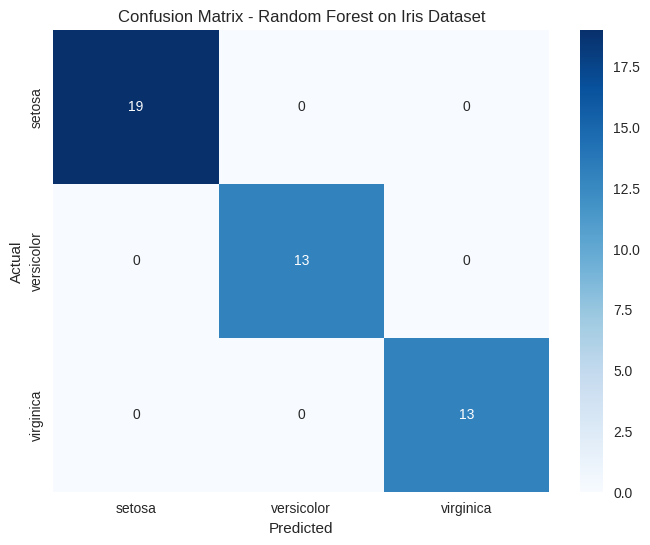

In [12]:
# Random Forest for Classification - Iris Dataset
def rf_classification_example():
    """Demonstrate Random Forest for classification using Iris dataset"""
    # Load Iris dataset
    iris = datasets.load_iris()
    X_iris = iris.data
    y_iris = iris.target
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
    
    # Train Random Forest
    rf_iris = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_iris.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_iris.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    print("🌸 Random Forest Classification - Iris Dataset:")
    print("=" * 50)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Number of trees: 100")
    print(f"Training samples: {len(X_train)}")
    print(f"Test samples: {len(X_test)}")
    
    # Classification report
    print(f"\n📋 Detailed Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title('Confusion Matrix - Random Forest on Iris Dataset')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return rf_iris, accuracy

# Run classification example
rf_iris, iris_accuracy = rf_classification_example()


📈 Random Forest Regression:
R² Score: 0.889
Mean Squared Error: 1346.757
Number of trees: 100
Features: 4


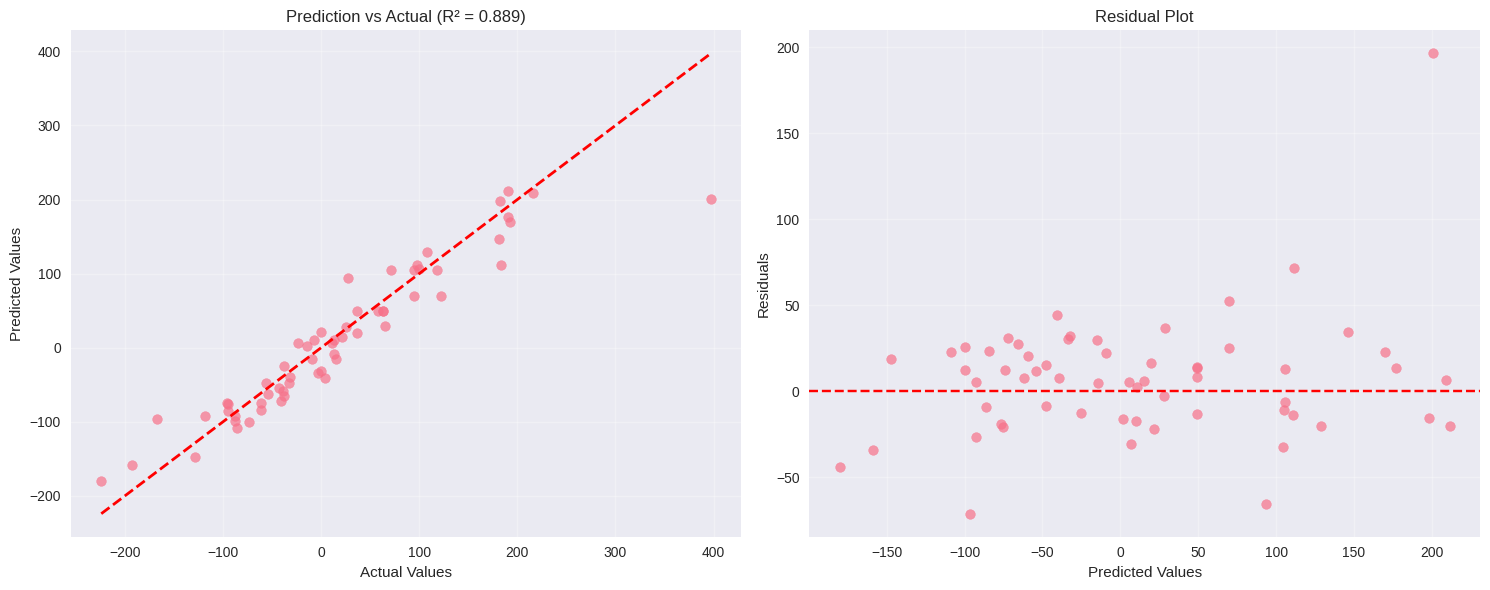

In [13]:
# Random Forest for Regression
def rf_regression_example():
    """Demonstrate Random Forest for regression"""
    # Create regression dataset
    X_reg, y_reg = make_regression(n_samples=200, n_features=4, noise=10, random_state=42)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
    
    # Train Random Forest Regressor
    rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_reg.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_reg.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = np.mean((y_test - y_pred) ** 2)
    
    print("📈 Random Forest Regression:")
    print("=" * 40)
    print(f"R² Score: {r2:.3f}")
    print(f"Mean Squared Error: {mse:.3f}")
    print(f"Number of trees: 100")
    print(f"Features: {X_reg.shape[1]}")
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Prediction vs Actual
    ax1.scatter(y_test, y_pred, alpha=0.7)
    ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax1.set_xlabel('Actual Values')
    ax1.set_ylabel('Predicted Values')
    ax1.set_title(f'Prediction vs Actual (R² = {r2:.3f})')
    ax1.grid(True, alpha=0.3)
    
    # Residuals
    residuals = y_test - y_pred
    ax2.scatter(y_pred, residuals, alpha=0.7)
    ax2.axhline(y=0, color='r', linestyle='--')
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Residuals')
    ax2.set_title('Residual Plot')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return rf_reg, r2, mse

# Run regression example
rf_reg, r2_score_val, mse_val = rf_regression_example()


## 8. Performance Analysis {#performance-analysis}

Let's analyze Random Forest's performance characteristics and compare it with other algorithms.


🆚 Algorithm Comparison - Iris Dataset:
Algorithm            Accuracy     Training Time  
------------------------------------------------------------
Random Forest        1.000        0.0568         
SVM                  1.000        0.0006         
KNN                  1.000        0.0003         
Logistic Regression  1.000        0.0060         
Naive Bayes          0.978        0.0003         


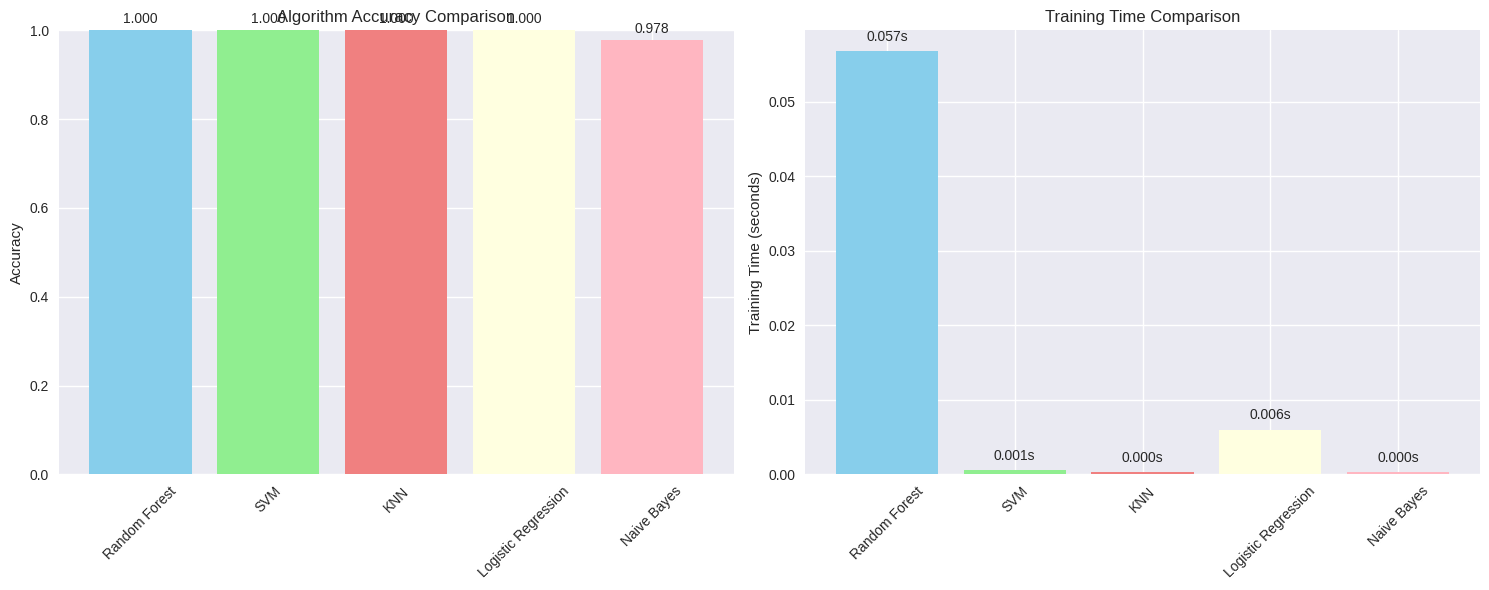

In [14]:
# Compare Random Forest with other algorithms
def compare_algorithms():
    """Compare Random Forest with other machine learning algorithms"""
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    
    # Load Iris dataset
    iris = datasets.load_iris()
    X_iris = iris.data
    y_iris = iris.target
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
    
    # Define algorithms
    algorithms = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Logistic Regression': LogisticRegression(random_state=42),
        'Naive Bayes': GaussianNB()
    }
    
    # Train and evaluate each algorithm
    results = {}
    
    print("🆚 Algorithm Comparison - Iris Dataset:")
    print("=" * 60)
    print(f"{'Algorithm':<20} {'Accuracy':<12} {'Training Time':<15}")
    print("-" * 60)
    
    for name, model in algorithms.items():
        # Measure training time
        import time
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time
        
        # Calculate accuracy
        accuracy = model.score(X_test, y_test)
        
        results[name] = {
            'accuracy': accuracy,
            'training_time': training_time,
            'model': model
        }
        
        print(f"{name:<20} {accuracy:<12.3f} {training_time:<15.4f}")
    
    # Create comparison visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Accuracy comparison
    names = list(results.keys())
    accuracies = [results[name]['accuracy'] for name in names]
    times = [results[name]['training_time'] for name in names]
    
    bars1 = ax1.bar(names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink'])
    ax1.set_title('Algorithm Accuracy Comparison')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim(0, 1)
    ax1.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, acc in zip(bars1, accuracies):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.3f}', ha='center', va='bottom')
    
    # Training time comparison
    bars2 = ax2.bar(names, times, color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink'])
    ax2.set_title('Training Time Comparison')
    ax2.set_ylabel('Training Time (seconds)')
    ax2.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, time in zip(bars2, times):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{time:.3f}s', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return results

# Run algorithm comparison
comparison_results = compare_algorithms()


## 9. Summary and Key Takeaways {#summary}

### 🎯 What We Learned:

1. **Random Forest Fundamentals**:
   - Ensemble method combining multiple decision trees
   - Bootstrap aggregating (bagging) for diversity
   - Feature randomness to reduce overfitting
   - Voting/averaging for final predictions

2. **Key Advantages**:
   - **High accuracy** - Often achieves excellent performance
   - **Robust to overfitting** - Multiple trees reduce overfitting risk
   - **Feature importance** - Provides insights into feature relevance
   - **Handles mixed data** - Works with both numerical and categorical features
   - **No feature scaling** - Doesn't require data normalization

3. **Hyperparameter Tuning**:
   - **n_estimators**: Number of trees (more trees = better performance, but diminishing returns)
   - **max_depth**: Tree depth (controls overfitting)
   - **min_samples_split**: Minimum samples to split a node
   - **min_samples_leaf**: Minimum samples in a leaf node
   - **max_features**: Number of features to consider for splitting

### 🚀 When to Use Random Forest:

✅ **Good for**:
- High-dimensional data
- Mixed data types (numerical + categorical)
- When you need feature importance
- When you want good performance with minimal tuning
- When interpretability is important
- When you have missing data

❌ **Not ideal for**:
- Very large datasets (memory intensive)
- When you need very fast prediction
- When you have limited computational resources
- When you need probability estimates (can be approximated)

### 🔧 Key Parameters to Tune:

1. **n_estimators**: Start with 100-200, increase if needed
2. **max_depth**: Start with None, add constraints if overfitting
3. **min_samples_split**: Start with 2, increase to reduce overfitting
4. **min_samples_leaf**: Start with 1, increase to reduce overfitting
5. **max_features**: Start with 'sqrt', try 'log2' or specific numbers

### 📚 Best Practices:

1. **Start with default parameters** - Random Forest works well out-of-the-box
2. **Use cross-validation** to find optimal hyperparameters
3. **Monitor overfitting** - Watch for large gap between train/test performance
4. **Feature importance** - Use to understand your data and select features
5. **Parallel processing** - Use n_jobs parameter for faster training

### 🆚 Random Forest vs Other Algorithms:

| Aspect | Random Forest | SVM | KNN | Logistic Regression |
|--------|---------------|-----|-----|-------------------|
| **Accuracy** | High | High | Medium | Medium |
| **Training Time** | Medium | Fast | None | Fast |
| **Prediction Time** | Fast | Fast | Slow | Fast |
| **Memory Usage** | High | Low | High | Low |
| **Interpretability** | High | Medium | High | High |
| **Feature Importance** | Yes | No | No | Yes |
| **Handles Mixed Data** | Yes | No | Yes | No |
| **Overfitting** | Low | Low | High | Medium |

### 📈 Next Steps:

1. Try Random Forest on your own datasets
2. Experiment with hyperparameter tuning
3. Compare with other ensemble methods (Gradient Boosting, XGBoost)
4. Explore feature selection using importance scores
5. Learn about advanced ensemble techniques

### 💡 Key Insights:

- **Ensemble learning** is powerful - combining multiple models often beats single models
- **Feature importance** is invaluable for understanding your data
- **Random Forest** is often a great starting point for many problems
- **Hyperparameter tuning** can significantly improve performance
- **Cross-validation** is essential for reliable performance estimates

---

**Congratulations! 🎉 You now understand Random Forest!**

Random Forest is one of the most versatile and powerful machine learning algorithms. It's often the go-to choice for many problems because it provides excellent performance with minimal tuning while offering valuable insights through feature importance analysis.
